In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [2]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable=False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [3]:
feature_extractor_model = Model(inputs=base_model.input, outputs=[base_model.get_layer('block1_conv2').output,
                                                                    base_model.get_layer('block2_conv2').output,
                                                                    base_model.get_layer('block3_conv3').output,
                                                                    base_model.get_layer('block4_conv3').output,
                                                                    base_model.get_layer('block5_conv3').output])

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
cifar = tf.keras.datasets.cifar10
(x_train, _), (x_test, _) = cifar.load_data()

In [5]:
image1 = x_train[5]
image2 = x_train[8]

array1 = np.array(image1)
array2 = np.array(image2)

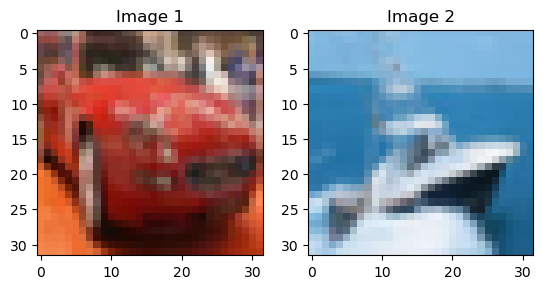

In [6]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[1].imshow(image2)
axes[1].set_title('Image 2')
plt.show()

In [7]:
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

In [8]:
features_image1 = feature_extractor_model.predict(image1)
features_image2 = feature_extractor_model.predict(image2)

1/1 [==============================] - 0s 82ms/step


In [9]:
features_image1[0].shape

(1, 32, 32, 64)

In [10]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
euclidean_distances_list = []
cosine_similarities_list = []
for i in range(len(features_image1)):
    # Flatten the feature maps
    flat_features_image1 = features_image1[i].flatten()
    flat_features_image2 = features_image2[i].flatten()
    
    euclidean_distance = euclidean_distances([flat_features_image1], [flat_features_image2])
    cosine_similarity_score = cosine_similarity([flat_features_image1], [flat_features_image2])

    euclidean_distances_list.append(euclidean_distance)
    cosine_similarities_list.append(cosine_similarity_score)



In [29]:
class ContentLoss:
    def __init__(self,imag1,image2,model):
        self.model=model
        self.image1=image1
        self.image2=image2
        self.__list_fm1=None
        self.__list_fm2=None
        self.euclidean=[]
        self.cosine=[]
        self.contentloss=[]
        
    def preprocess(self):
        array1 = np.array(self.image1)
        array2 = np.array(self.image2)
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(image1)
        axes[0].set_title('Image 1')
        axes[1].imshow(image2)
        axes[1].set_title('Image 2')
        plt.show()
        
    def generate_features(self):
        image1 = np.expand_dims(self.image1, axis=0)
        image2 = np.expand_dims(self.image2, axis=0)
        self.__list_fm1 = self.model.predict(image1)
        self.__list_fm2 = self.model.predict(image2)
        print("done.")
        
        
    def sim_euc(self):
        for i in range(len(self.__list_fm1)):
            flat_features_image1 = self.__list_fm1[i].flatten()
            flat_features_image2 = self.__list_fm2[i].flatten()
            euclidean_distance = euclidean_distances([flat_features_image1], [flat_features_image2])
            cosine_similarity_score = cosine_similarity([flat_features_image1], [flat_features_image2])
            self.euclidean.append(euclidean_distance)
            self.cosine.append(cosine_similarity_score)
        print("done.")
            
    def Contentloss(self):
        print("inform:........preprocessing  image")
        self.preprocess()
        print("Inform:........Finding features map of 2 given images.")
        self.generate_features()
        print("Done..\n")
        print("Finding distance.......")
        self.sim_euc()
        print("Finding Content loss.............\n")
        print("**********************************")
        for i in range(len(self.euclidean)):
            print(f"Euclidean Distance for feature map {i+1}: {self.euclidean[i]}")
            print(f"Cosine Similarity for feature map {i+1}: {self.cosine[i]}\n")
            print("****************************************************************")
        print("************************************")
        print("content loss: Giving 100 times to 5th and 10 times to 4th...",100*self.euclidean[4]+10*self.euclidean[3])
    
        

In [30]:
image1 = x_train[9]
image2 = x_train[24]

In [31]:
from PIL import Image
path1='./n03445777_14051.JPEG'
path2='./n03445777_4061.JPEG'
image1 = Image.open(path1)
image1=image1.resize((320,320))
image2=Image.open(path2)
image2=image2.resize((320,320))

In [32]:
cl=ContentLoss(image1,image2,feature_extractor_model)

inform:........preprocessing  image


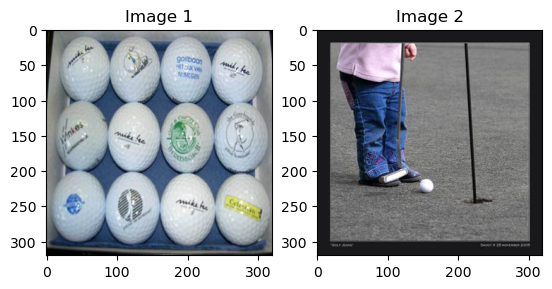

Inform:........Finding features map of 2 given images.
1/1 [==============================] - 2s 2s/step
done.
Done..

Finding distance.......
done.
Finding Content loss.............

**********************************
Euclidean Distance for feature map 1: [[504683.34]]
Cosine Similarity for feature map 1: [[0.7624757]]

****************************************************************
Euclidean Distance for feature map 2: [[947130.5]]
Cosine Similarity for feature map 2: [[0.32324532]]

****************************************************************
Euclidean Distance for feature map 3: [[826737.2]]
Cosine Similarity for feature map 3: [[0.14929369]]

****************************************************************
Euclidean Distance for feature map 4: [[134344.28]]
Cosine Similarity for feature map 4: [[0.08014964]]

****************************************************************
Euclidean Distance for feature map 5: [[7630.2354]]
Cosine Similarity for feature map 5: [[0.02524236]]


In [33]:
cl.Contentloss()

inform:........preprocessing  image


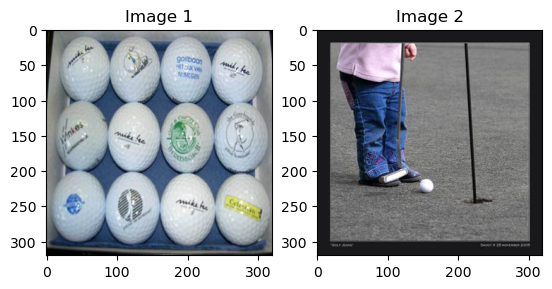

Inform:........Finding features map of 2 given images.
1/1 [==============================] - 5s 5s/step
done.
Done..

Finding distance.......
done.
Finding Content loss.............

**********************************
Euclidean Distance for feature map 1: [[0.]]
Cosine Similarity for feature map 1: [[0.99993265]]

****************************************************************
Euclidean Distance for feature map 2: [[0.]]
Cosine Similarity for feature map 2: [[0.9999899]]

****************************************************************
Euclidean Distance for feature map 3: [[0.]]
Cosine Similarity for feature map 3: [[0.999999]]

****************************************************************
Euclidean Distance for feature map 4: [[0.]]
Cosine Similarity for feature map 4: [[1.0000002]]

****************************************************************
Euclidean Distance for feature map 5: [[0.00027296]]
Cosine Similarity for feature map 5: [[1.]]

***********************************

In [34]:
# image1 = x_train[9]
# image2 = x_train[9]
cl=ContentLoss(image1,image1,feature_extractor_model)
cl.Contentloss()